I would like to use this practice notebook to practice utilizing linear vs non linear models.  Practice utilizing cross validation.  Practice avoiding data leakage when using scaling and imputation if options.  Minor practice using pipe lines

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Info and Notes

|Variable|Definition|Key|
|:-------|:--------:|--:|
|survival|Survival|	0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex|1 = m 0 = f |	
|Age|Age|in years|	
|sibsp|# of siblings| / spouses aboard the Titanic|	
|parch|# of parents| / children aboard the Titanic|	
|ticket|Ticket number|	|
|fare|Passenger fare| |	
|cabin|Cabin number|	|
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

### Variable Notes:

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Data Wrangling

In [2]:
train_set = pd.read_csv('train.csv')

In [3]:
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_set.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [43]:
train_set.drop(labels = 'Cabin', axis =1, inplace = True)

In [54]:
train_set.dropna(subset = ['Embarked'], inplace = True)

In [7]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

train_set.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [8]:
pd.reset_option('display.float_format')

## Exploratory Data Analysis

In [9]:
def count_vis(col, data):
    sns.countplot(x = col, data = data)
    plt.show()

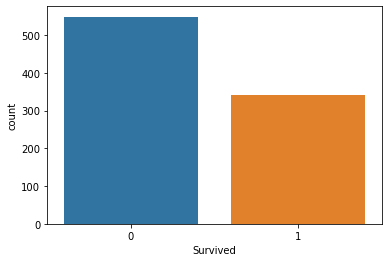

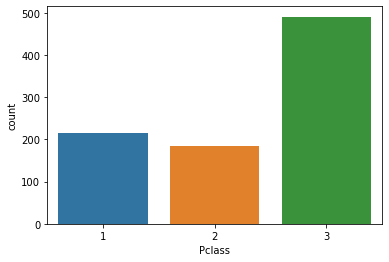

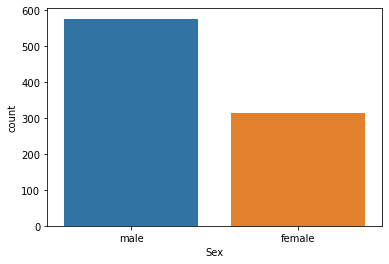

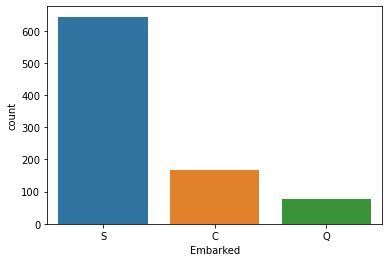

In [10]:
cols = ['Survived', 'Pclass', 'Sex','Embarked']

for col in cols:
    count_vis(col,train_set)

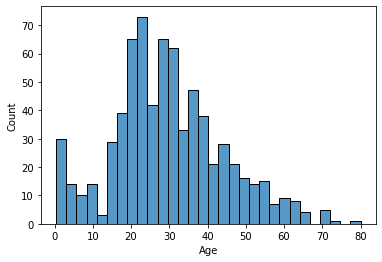

In [11]:
sns.histplot(x = 'Age', data = train_set,bins =30)
plt.show()

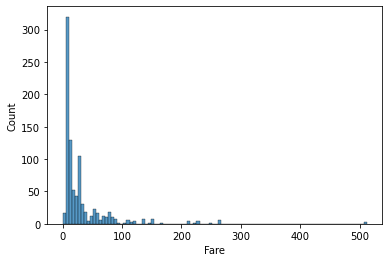

In [12]:
sns.histplot(x = 'Fare', data = train_set, bins= 100)
plt.show()

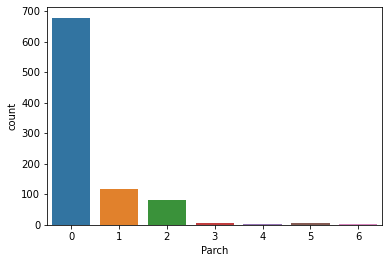

In [13]:
sns.countplot(x = 'Parch', data = train_set)
plt.show()

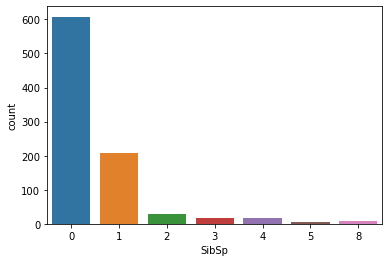

In [14]:
sns.countplot(x = 'SibSp', data = train_set)
plt.show()

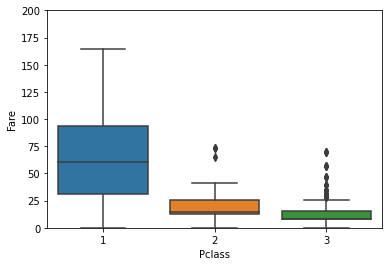

In [15]:
sns.boxplot(x = 'Pclass', y='Fare', data = train_set)
plt.ylim(0,200)
plt.show()

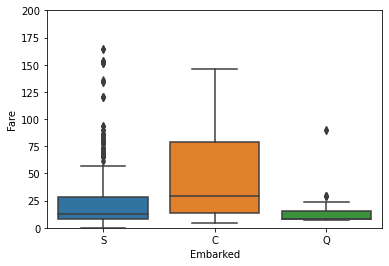

In [17]:
sns.boxplot(x = 'Embarked', y='Fare', data = train_set)
plt.ylim(0,200)
plt.show()

### Interactions with Survival (Target)

#### Target Vs Catergorical

In [19]:
import scipy.stats as stat

In [20]:
def catcat_int(df, col1, col2):
    
    crosstab= pd.crosstab(df[col1], df[col2])
    crosstab.plot.bar()
        
    
    c, p, dof, expected= stat.chi2_contingency(crosstab)
    if p<.001:
        p='<.001'
    else:
        p = np.round(p,4)
  
    plt.title('Chi2: {}     P-value: {}'.format(np.round(c,2),p))
    
    
    

In [21]:
def surv_vis(title, xlab, ylab):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.suptitle(title,
                 fontweight = 'bold',
                 fontsize ='x-large')
    plt.xticks([0, 1], ['Deceased', 'Survived'], rotation = 0)
    plt.show

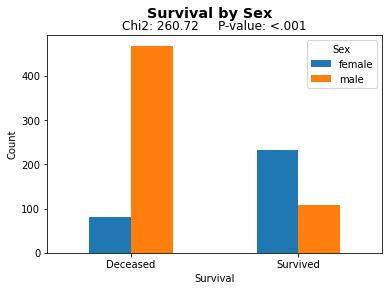

In [22]:
catcat_int(train_set,'Survived','Sex')

surv_vis('Survival by Sex', 'Survival', 'Count')



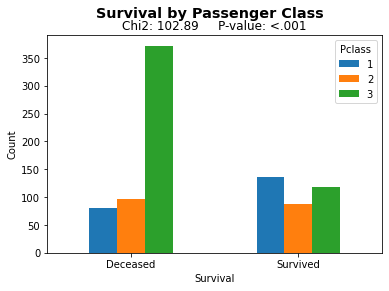

In [23]:
catcat_int(train_set,'Survived','Pclass')

surv_vis('Survival by Passenger Class', 'Survival', 'Count')

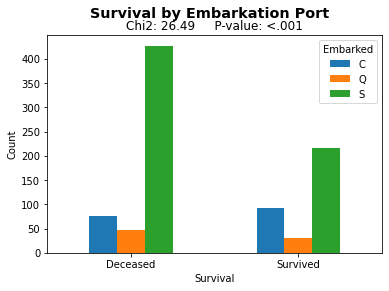

In [24]:
catcat_int(train_set,'Survived','Embarked')

surv_vis('Survival by Embarkation Port', 'Survival', 'Count')

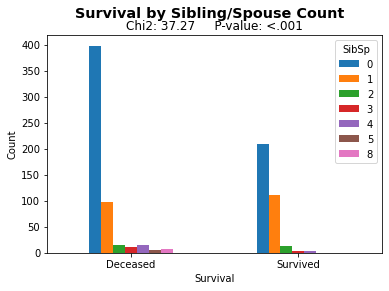

In [28]:
catcat_int(train_set,'Survived','SibSp')

surv_vis('Survival by Sibling/Spouse Count', 'Survival', 'Count')


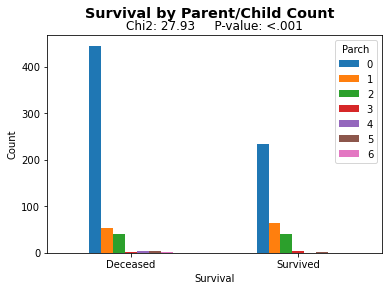

In [30]:
catcat_int(train_set,'Survived','Parch')

surv_vis('Survival by Parent/Child Count', 'Survival', 'Count')

#### Target Vs Continous

In [31]:
def catcont_int(df, col1, col2):
    sns.boxplot(x = col1, y=col2, data = df)
    
    
def surv_vis(title, xlab, ylab):
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.suptitle(title,
                 fontweight = 'bold',
                 fontsize ='x-large')
    plt.xticks([0, 1], ['Deceased', 'Survived'], rotation = 0)
    plt.show

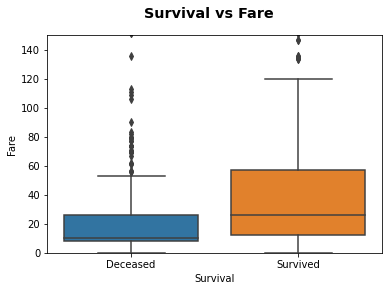

In [33]:
catcont_int(train_set,'Survived','Fare')

plt.ylim(0,150)

surv_vis('Survival vs Fare', 'Survival', 'Fare')


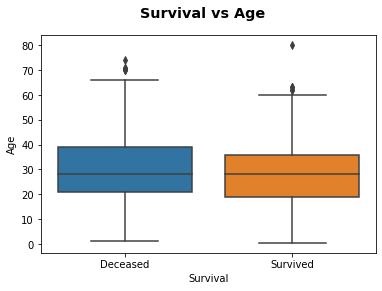

In [34]:
catcont_int(train_set,'Survived','Age')

surv_vis('Survival vs Age', 'Survival', 'Age')

## Preprocessing


In [59]:
one_hot_encoded = pd.get_dummies(train_set, columns = ['Sex','Pclass', 'Embarked'], drop_first = False)

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,0,1,0,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,1,0,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,1,0,0,0,1,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,0,1,1,0,0,1,0,0


Pipeline 
drop cabin column
dropna embarked
Impute Age